In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
transaction_features = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': ['mean', 'sum', 'count']
}).reset_index()
transaction_features.columns = [
    'CustomerID', 'TotalQuantity', 'AvgTransactionValue', 'TotalSpent', 'TransactionCount'
]

customer_data = pd.merge(customers, transaction_features, on='CustomerID', how='left').fillna(0)

features = customer_data[['TotalQuantity', 'AvgTransactionValue', 'TotalSpent', 'TransactionCount']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Performing K-Means clustering

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


n_clusters = 7 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

customer_data['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Number of Clusters: {n_clusters}')
print(f'Davies-Bouldin Index: {db_index}')

Number of Clusters: 7
Davies-Bouldin Index: 0.9383825640893448


In [6]:
# Performing K-Means clustering

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

customer_data['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Number of Clusters: {n_clusters}')
print(f'Davies-Bouldin Index: {db_index}')

Number of Clusters: 2
Davies-Bouldin Index: 0.9382751411126716


In [9]:
# Performing K-Means clustering

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

customer_data['Cluster'] = clusters

db_index = davies_bouldin_score(scaled_features, clusters)
print(f'Number of Clusters: {n_clusters}')
print(f'Davies-Bouldin Index: {db_index}')

Number of Clusters: 5
Davies-Bouldin Index: 0.9379619683629175


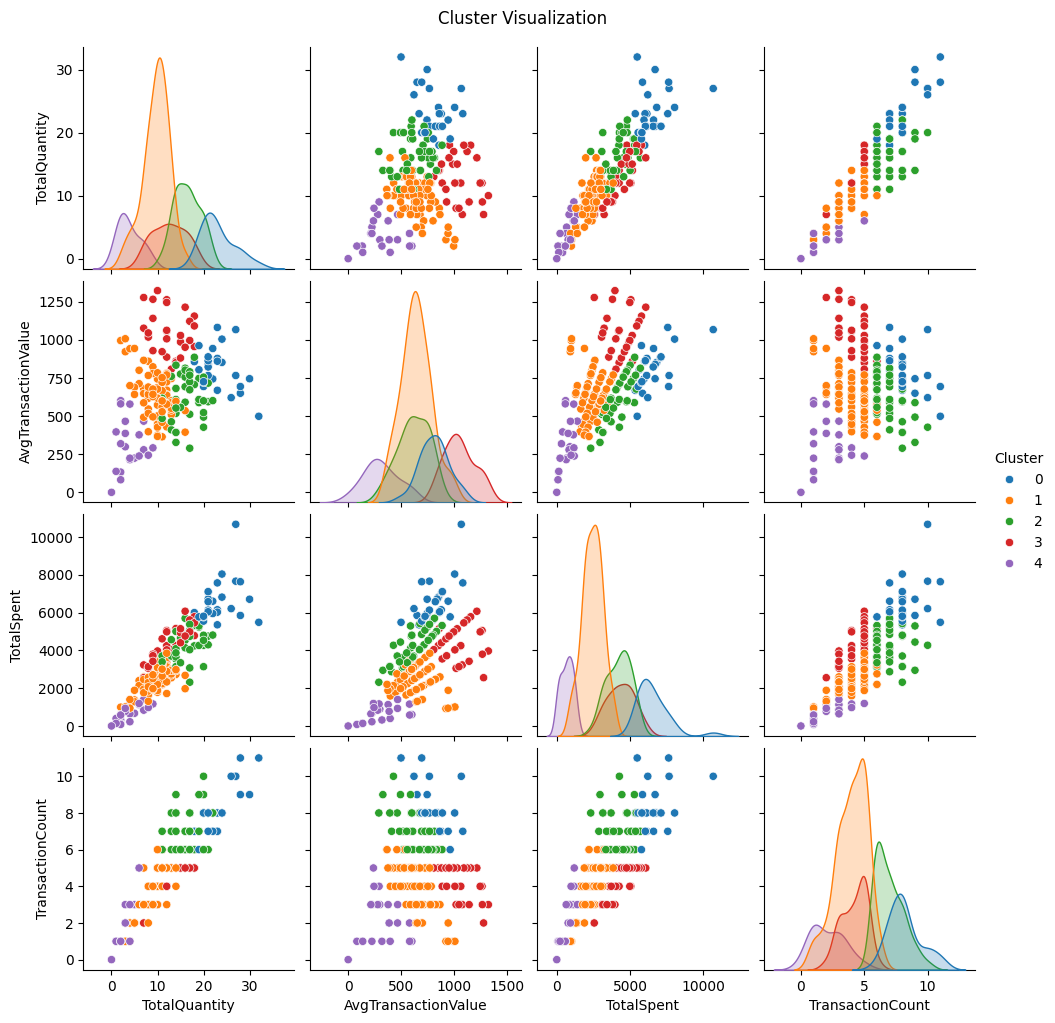

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(customer_data, vars=['TotalQuantity', 'AvgTransactionValue', 'TotalSpent', 'TransactionCount'], hue='Cluster', palette='tab10')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()

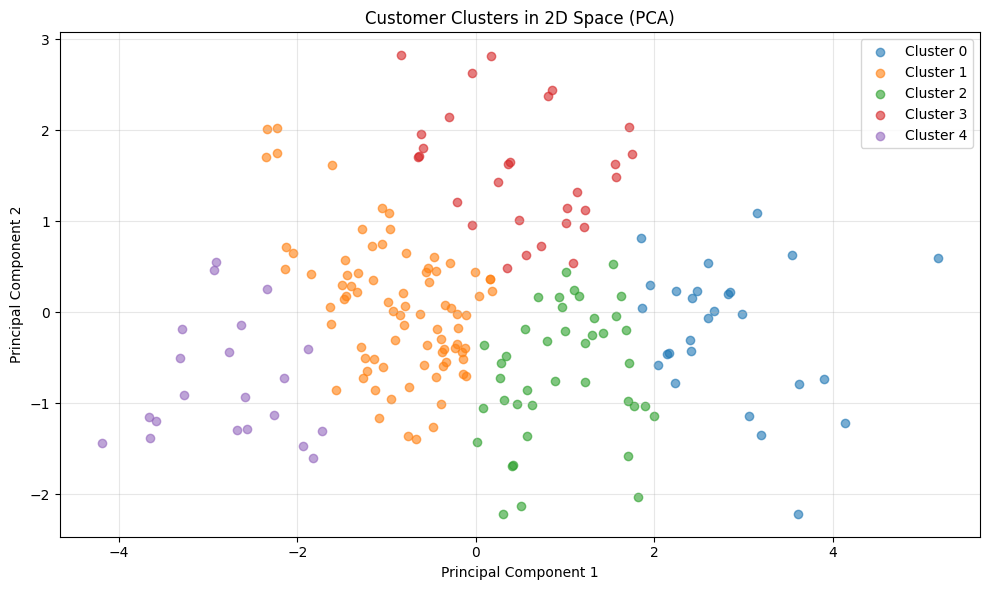

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_points = reduced_features[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters in 2D Space (PCA)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
